In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
def g_x(x,n=10,alpha=4/5):
    return sum(np.exp(-(x - k)**2 * k) / k**alpha for k in range(1, n+1))


In [26]:
def metropolis_hastings(g, num_samples=1000000, proposal_width=1.0, x_init=5):
    samples = []
    x = x_init
    for _ in range(num_samples):
        x_proposed = x + np.random.uniform(-proposal_width, proposal_width)
        acceptance_ratio = g(x_proposed) / g(x) if g(x) > 0 else 0
        if np.random.rand() < acceptance_ratio:
            x = x_proposed
        samples.append(x)
    return np.array(samples)

samples = metropolis_hastings(g_x)


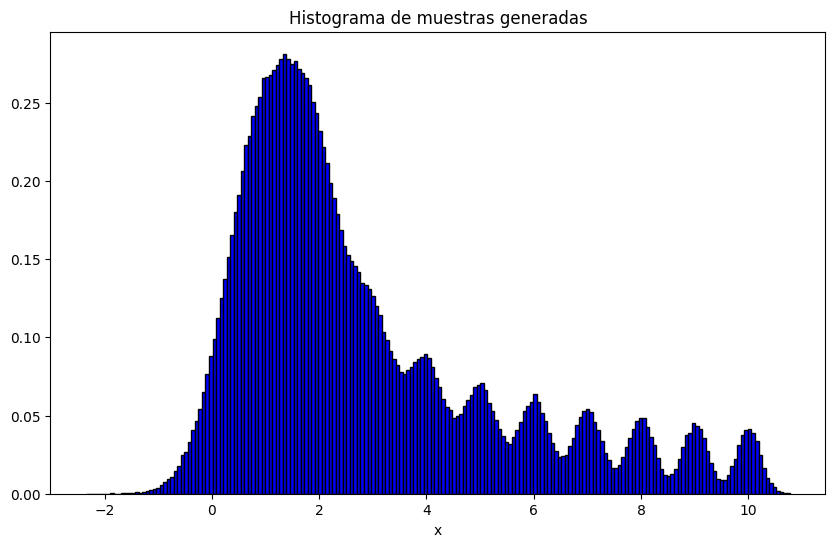

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=200, density=True, color='b', edgecolor='black')
plt.xlabel("x")
plt.title("Histograma de muestras generadas")
plt.savefig("1.a.pdf")
plt.show()

In [28]:
pi_sqrt= np.sqrt(np.pi)

In [38]:
def gaussiana(x):
    return np.exp(-x**2)

div= gaussiana(samples)/g_x(samples)
suma = np.sum(div)

In [ ]:
# Calcular A y su incertidumbre
mean_s = np.mean(div)
std_s = np.std(div, ddof=1)
A = np.sqrt(np.pi) / mean_s
sigma_A = np.sqrt(np.pi) * std_s / (np.sqrt(1000000) * mean_s)

print(f"1.b) {sigma_A:.6f}")

1.b) 0.007225
